<a href="https://colab.research.google.com/github/zuzg/knapsack-problem/blob/main/knapsack_data_chart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KNAPSACK PROBLEM

## ITEMS GENERATOR

In [5]:
import random

#ns = [10, 50, 100, 500, 1000, 2000, 5000, 10000, 15000, 20000] #wykres 3D
ns = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100] #wszystkie 3 (effectiveness &time)
#ns = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000] #DP & GA time

# output format
# weight value

def generate(n):
    f = open("data/items%s.txt" %n, 'w')
    
    for i in range(n):
        weight = random.randint(10,100) #1000
        value = random.randint(1000, 10000)
        f.write(str(weight) + " " + str(value) + "\n")
    f.close()

for n in ns:
    generate(n)
    print(str(n) + " elements done")

10 elements done
50 elements done
100 elements done
500 elements done
1000 elements done
2000 elements done
5000 elements done
10000 elements done
15000 elements done
20000 elements done


## SPECJALNA INSTANCJA DLA EFFECIVENESS

In [17]:
import random
ns = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
# output format
# weight value

def generate(n):
    f = open("data_special/items%s.txt" %n, 'w')
    f.write(str(6) + " " + str(11) + "\n")
    
    for i in range(n-1): 
        f.write(str(5) + " " + str(10) + "\n")
    f.close()

for n in ns:
    generate(n)
    print(str(n) + " elements done")

10 elements done
20 elements done
30 elements done
40 elements done
50 elements done
60 elements done
70 elements done
80 elements done
90 elements done
100 elements done


## 3D CHART

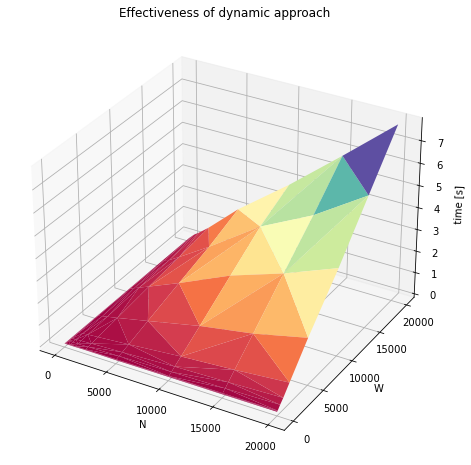

In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

f = open("results/dynamic3d.txt", 'r')

N = []
W = []
T = []

for line in f:
    n, w, t = [int(x) for x in line.split()]
    N.append(n)
    W.append(w)
    T.append(t/1000)

fig = plt.figure(figsize = (12,8))
ax = fig.gca(projection='3d')
ax.plot_trisurf(N, W, T, linewidth=0.2, antialiased=True, cmap=plt.cm.Spectral)

ax.set_xlabel("N")
ax.set_ylabel("W")
ax.set_zlabel("time [s]")
ax.axes.xaxis.set_ticks([0, 5000, 10000, 15000, 20000])
ax.axes.yaxis.set_ticks([0, 5000, 10000, 15000, 20000])

ax.set_title("Effectiveness of dynamic approach")

#plt.show()
plt.savefig("charts/chart3D.png")

## EFFECTIVENESS CHART (QUALITY)

In [3]:
import matplotlib.pyplot as plt
import numpy as np
n = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
special = False

In [4]:
def read_data (filename):
    data = []
    time_measure = []
    f = open(filename)
    for no in n:
        temp = f.readline().split()
        #print(temp)
        data.append(int(temp[1]))
        time_measure.append(int(temp[2])/1000) #sekundy
    f.close()
    return data, time_measure;

In [53]:
if (not(special)):
    DP, timeDP = read_data("results/DP.txt")
    GA, timeGA = read_data("results/GA.txt")
    BF, timeBF = read_data("results/BF.txt")
else:
    DP, timeDP = read_data("results/DP_special.txt")
    GA, timeGA = read_data("results/GA_special.txt")
    BF, timeBF = read_data("results/BF_special.txt")
    
for i in range(len(n)):
    GA[i]=GA[i]/BF[i]
    DP[i]=DP[i]/BF[i]
    BF[i]=BF[i]/BF[i]
    
#print(DP)
#print(GA)
#print(BF)

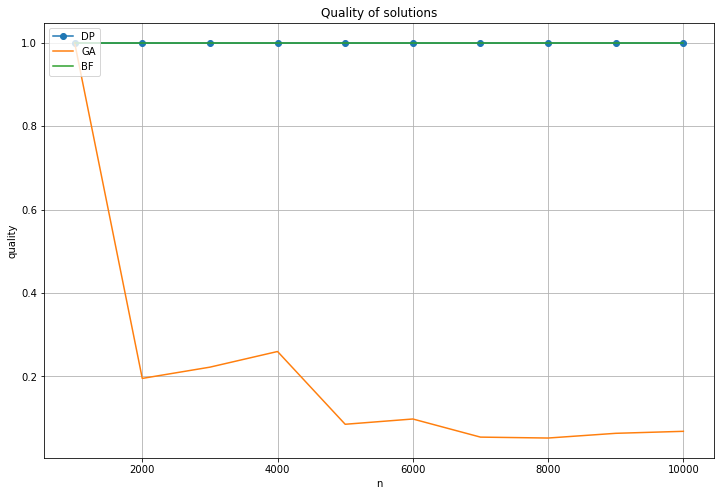

In [56]:
fig, ax = plt.subplots(figsize = (12,8))

ax.plot(n, DP, label = "DP", marker = 'o')  
ax.plot(n, GA, label = "GA") 
ax.plot(n, BF, label = "BF") 

ax.set_xlabel("n")
ax.set_ylabel("quality")
plt.legend(loc='upper left')
plt.grid(True)
ax.set_title("Quality of solutions")
plt.show

if(not(special)):
    plt.savefig("charts/chart_quality.svg")
else:
    plt.savefig("charts/chart_quality_special.svg")

## TIME CHART (all methods)

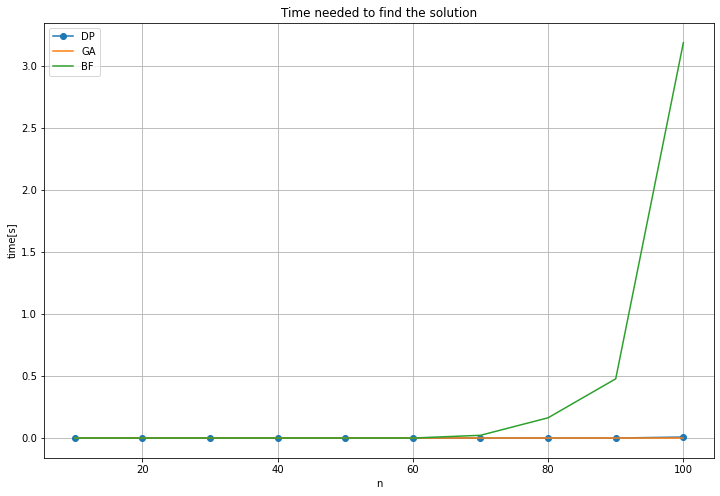

In [5]:
n = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

DP, timeDP = read_data("results/DP.txt")
GA, timeGA = read_data("results/GA.txt")
BF, timeBF = read_data("results/BF.txt")

fig, ax = plt.subplots(figsize = (12,8))

ax.plot(n, timeDP, label = "DP", marker = 'o')  
ax.plot(n, timeGA, label = "GA") 
ax.plot(n, timeBF, label = "BF") 

ax.set_xlabel("n")
ax.set_ylabel("time[s]")
plt.legend(loc='upper left')
plt.grid(True)
ax.set_title("Time needed to find the solution")
plt.show

plt.savefig("charts/chart_time.png")

## DP & GA TIME COMPARISON

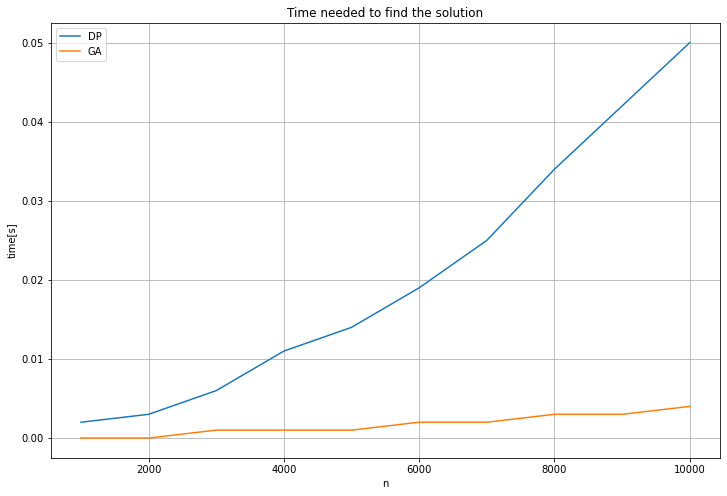

In [7]:
import matplotlib.pyplot as plt
import numpy as np
n = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]

NULL, timeDP = read_data("results/DP_big.txt")
NULL, timeGA = read_data("results/GA_big.txt")

fig, ax = plt.subplots(figsize = (12,8))

ax.plot(n, timeDP, label = "DP")  
ax.plot(n, timeGA, label = "GA") 

ax.set_xlabel("n")
ax.set_ylabel("time[s]")
plt.legend(loc='upper left')
plt.grid(True)
ax.set_title("Time needed to find the solution")
plt.show

plt.savefig("charts/chart_time2.png")

#### często wychodzą takie grzybiarskie wyniki